In [69]:
import plotly.io as pio
import plotly.express as px

pio.templates.default = "plotly_white"

import pandas as pd
import scipy
import numpy as np

from IPython.display import Image


%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [82]:
# Page 36, IPCC AR6 SPM
class Constants:
    DEGREES_CELSIUS_PER_1000_GT = 0.45
    DEGREES_CELCSIUS_PER_GT = DEGREES_CELSIUS_PER_1000_GT / 1_000
    CURRENT_EMISSIONS_PER_YEAR = 40  # Page 16 SPM

    C_IN_C02 = 1 / 3.67  # https://skepticalscience.com/print.php?r=45

<IPython.core.display.Javascript object>

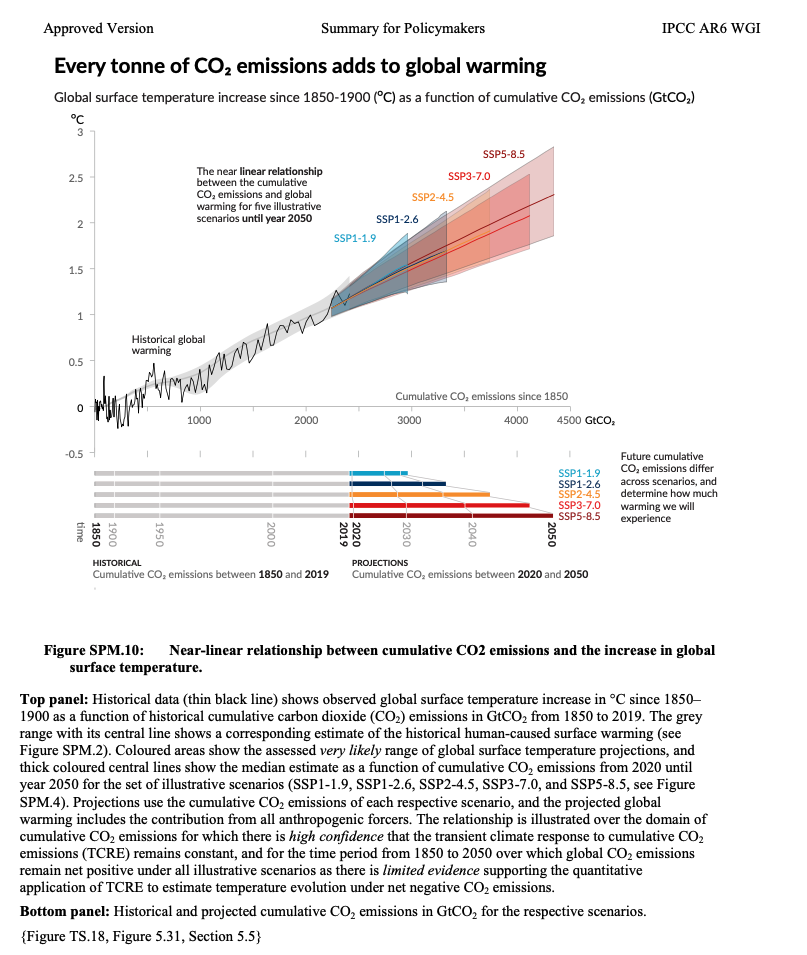

<IPython.core.display.Javascript object>

In [10]:
# Relevant graph from AR6 we need to convert
Image("./images/ar6.png")

In [118]:
def calculate_trajectory(
    end_year: int,
    alpha=1,
    beta=1,
    start_year=2022,
    start_emissions=Constants.CURRENT_EMISSIONS_PER_YEAR,
    end_emissions=0,
):
    """
    alpha is a parameter used to control the 'curviness' of the beta distribution which we're using to define
    the trajectory

    a = 1 : straight line
    a = 0.1: concave
    a = 2: convex

    b is optional, controls sigmoidalli-ness
    """
    n_years = end_year - start_year
    probs = np.linspace(0, 1, n_years)

    dist = scipy.stats.beta(a=alpha, b=beta)
    cdf = dist.cdf(probs)

    # Reverse so we're going 1 -> 0
    trajectory = np.flip(cdf)
    trajectory *= start_emissions

    return trajectory


def total_carbon(trajectory: np.array):
    ...


def total_warming():
    ...

<IPython.core.display.Javascript object>

In [127]:
emissions_trajectory = calculate_trajectory(2050, 0.1, 1)

<IPython.core.display.Javascript object>

In [128]:
px.line(emissions_trajectory)

<IPython.core.display.Javascript object>

In [75]:
emissions = emissions_trajectory.sum()
emissions

452.177920125883

<IPython.core.display.Javascript object>

In [92]:
warming = emissions * Constants.DEGREES_CELCSIUS_PER_GT
warming

0.20348006405664734

<IPython.core.display.Javascript object>

This warming is much less than you'd expect, but that's because it's compared to _now_ and we're already at 1.4 or something. 

Classically we're measuring relative to 1850-1900 temperatures, so we should measure total carbon flux since then.

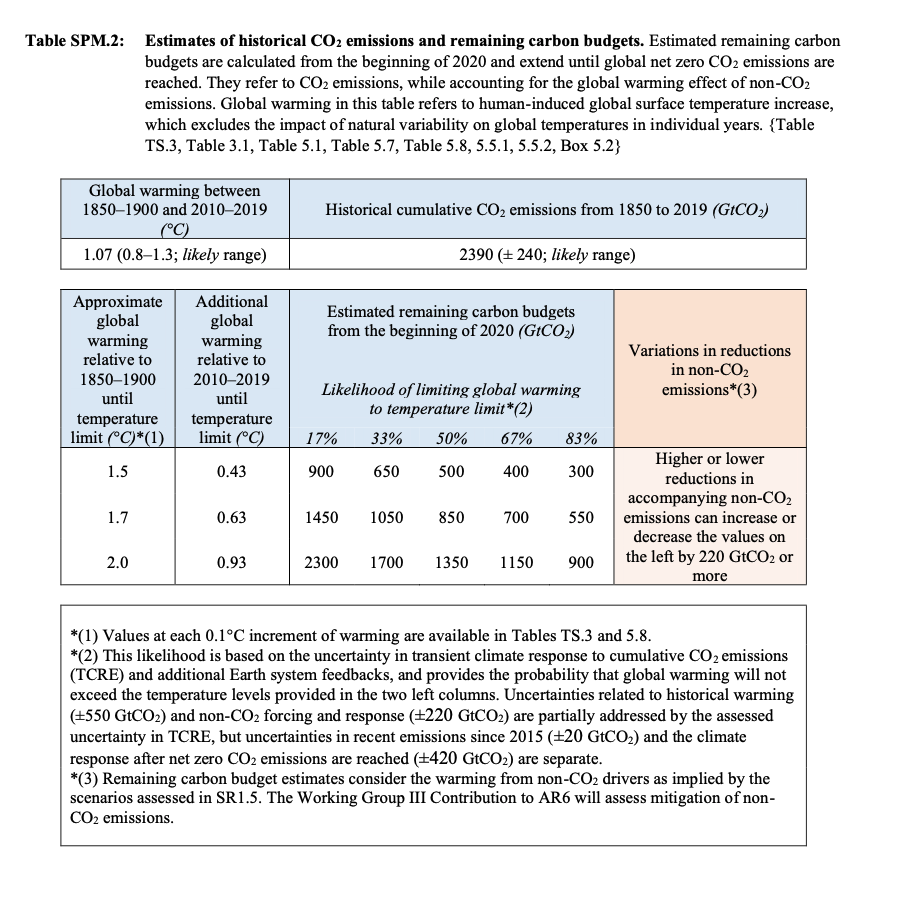

<IPython.core.display.Javascript object>

In [90]:
Image("./images/ar6-spm2.png")

In [88]:
gt_emissions_since_industrial_period = 2390  # screenshot above, SPM.2 AR6

<IPython.core.display.Javascript object>

In [89]:
estimated_increase_since_industrial_period = (
    gt_emissions_since_industrial_period * Constants.DEGREES_CELCSIUS_PER_GT
)

estimated_increase_since_industrial_period

1.0755

<IPython.core.display.Javascript object>

Ok, good, we get 1.07 just like they do.

# Composing into a graph with slider

In [143]:
def trajectory_to_df(
    trajectory: np.array, alpha: float, start_year=2022
) -> pd.DataFrame:
    df = pd.DataFrame(trajectory, columns=["emissions"])
    df["year"] = df.index + start_year
    df["alpha"] = alpha
    return df

<IPython.core.display.Javascript object>

In [145]:
dfs = []
for alpha in np.linspace(0, 2, 20):
    trajectory = calculate_trajectory(2050, alpha=alpha)
    dfs.append(trajectory_to_df(trajectory, alpha=alpha))

<IPython.core.display.Javascript object>

In [146]:
calculate_trajectory(2050, alpha=alpha)

array([40.        , 37.09190672, 34.29355281, 31.60493827, 29.0260631 ,
       26.5569273 , 24.19753086, 21.9478738 , 19.8079561 , 17.77777778,
       15.85733882, 14.04663923, 12.34567901, 10.75445816,  9.27297668,
        7.90123457,  6.63923182,  5.48696845,  4.44444444,  3.51165981,
        2.68861454,  1.97530864,  1.37174211,  0.87791495,  0.49382716,
        0.21947874,  0.05486968,  0.        ])

<IPython.core.display.Javascript object>

In [148]:
emissions_df = pd.concat(dfs)

<IPython.core.display.Javascript object>

In [149]:
emissions_df.query("year==2030")

,emissions,year,alpha
8,NaN,2030,0.000000
8,38.547460,2030,0.105263
8,37.147666,2030,0.210526
8,35.798704,2030,0.315789
8,34.498728,2030,0.421053
8,33.245958,2030,0.526316
8,32.038681,2030,0.631579
8,30.875244,2030,0.736842
8,29.754056,2030,0.842105
8,28.673581,2030,0.947368


<IPython.core.display.Javascript object>

In [151]:
fig = px.line(
    emissions_df, x="year", y="emissions", animation_frame="alpha", range_y=[0, 40]
)

fig["layout"].pop("updatemenus")  # optional, drop animation buttons
fig.show()

<IPython.core.display.Javascript object>